<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/marketing/blob/main/customer_analytics_eda_inferential_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              Table of Contents
</h1>
</div>

1. [Importing Libraries](#libraries)
2. [Loading Data](#loading)
3. [Helper Functions](#utils)
4. [EDA](#eda)
    1. [Uni-variant Analysis](#uni_varient)
    2. [Bi-variant Analysis](#bi_varient)
5. [Inferential Statistics](#inferential)
6. [Clustering; Customer Analytics](#clustering)
    1. [Evaluation of different clustering algorithms](#clustering_evaluation)
    2. [KMeans Clustering Results](#kmeans_results)

<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              1- Importing Libararies
</h1>
<a class="anchor" id="libraries"></a>
</div>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import (
    DBSCAN,
    KMeans,
    AgglomerativeClustering,
    MeanShift,
)
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression, VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    rand_score,
    fowlkes_mallows_score,
)
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from typing import Tuple

<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              2- Loading Data
</h1>
<a class="anchor" id="loading"></a>
</div>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/marketing/shopping_trends_updated.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [9]:
df.duplicated().any()

False

In [10]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [11]:
for col in df.columns:
  if df[col].dtype == object:
    print(df[col].value_counts())
    print('**********************')

Gender
Male      2652
Female    1248
Name: count, dtype: int64
**********************
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64
**********************
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
**********************
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
L

In [12]:
df['Customer ID'].value_counts()

,count
Customer ID,
1,1
2621,1
2593,1
2594,1
2595,1
...,...
1305,1
1306,1
1307,1


<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              3- Helper Functions
</h1>
<a class="anchor" id="utils"></a>
</div>

In [13]:
def pareto_diagram(input_df: pd.DataFrame, column: str) -> pd.DataFrame:
  """Plots pareto diagram of a categorical column"""
  df = input_df[[column]].copy()
  df['frequency'] = 1
  df[column] = df[column].apply(lambda x: str(x))
  df = df.groupby(column).sum().sort_values('frequency', ascending=False)
  df['relative frequency'] = df['frequency'].apply(lambda x: 100*x/df['frequency'].sum())
  df['cumulative frequency'] = df['relative frequency'].cumsum()

  fig = plt.figure(figsize=(12,8))
  ax = fig.add_subplot(111)
  ax.set_ylim(0,130)
  x = np.arange(len(df))
  y = df['cumulative frequency']
  plt.plot(y, color='orangered', marker='o', linestyle='dashed')  #cumulative plot
  plt.bar(x=df.index, height=df['relative frequency']) #histogram

  for i,j in zip(x,y):
      ax.annotate(str(np.round(j)),xy=(i,j+2))
  plt.show()

  return df

In [14]:
def box_plots(df: pd.DataFrame,
              categorical_feature: str,
              color: str,
              *numerical_features: list,
              figsize: Tuple = (18, 5),
              rotation: int=None):
  """
  Shows boxplots of one categorical column vs a list of numerical features
  """
  plt.figure(figsize=figsize)
  plots_num = len(numerical_features)
  for i, col in enumerate(numerical_features):
    counter = int(f'1{plots_num}{i+1}')
    plt.subplot(counter)
    sns.boxplot(data=df, x=categorical_feature, y=col, color=color)
    if rotation:
      plt.xticks(rotation=rotation)
  plt.show()

In [15]:
def label_function(val) -> str:
    """Returns percentage labels for pie charts"""
    return f'{val:.0f}%'

In [16]:
# Color palette used for designing markdowns and the plots in this notebook

colors=['#F5E3E0', '#E8B4BC', '#D282A6', '#6E4555', '#3A3238', '#63595C', '#F0EDEE']

<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              4- EDA
</h1>
<a class="anchor" id="eda"></a>
</div>

<div style="display:fill;
           border-radius:5px;
           background-color:#6E4555;
           font-size:80%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: left">

<h2 style="padding: 10px;
              color:#F0EDEE;">
              4-1- Uni-variant Analysis
</h2>
<a class="anchor" id="uni_varient"></a>
</div>

In [17]:
bar_columns = ['Item Purchased', 'Location', 'Color']  # Best practice for analysing these columns could be bar chart
pie_columns = ['Gender', 'Category', 'Size', 'Season',
               'Subscription Status', 'Shipping Type',
               'Discount Applied', 'Promo Code Used',
               'Payment Method', 'Frequency of Purchases']  # Best practice for analysing these columns could be pie chart
numerical_columns = ['Age', 'Purchase Amount (USD)',
                     'Review Rating', 'Previous Purchases']  # Best practice for analysing these columns could be histogram

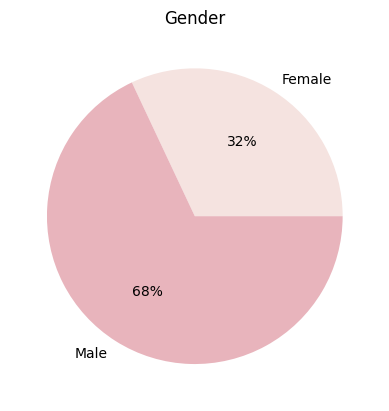

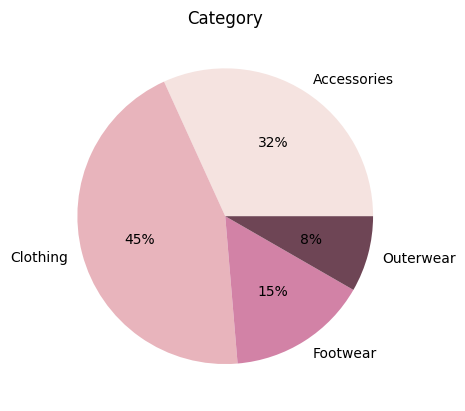

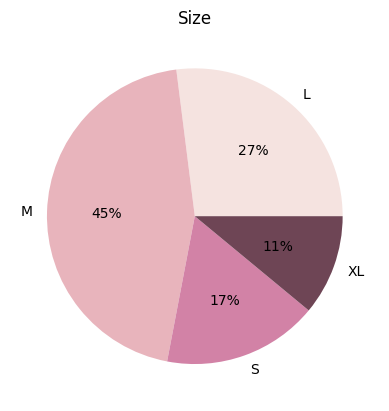

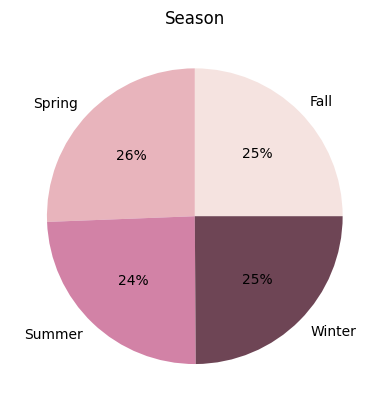

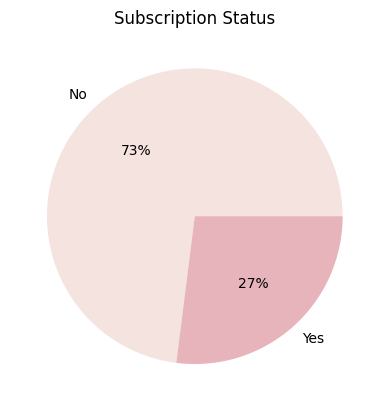

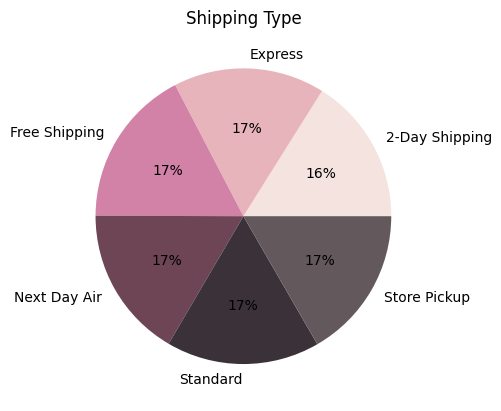

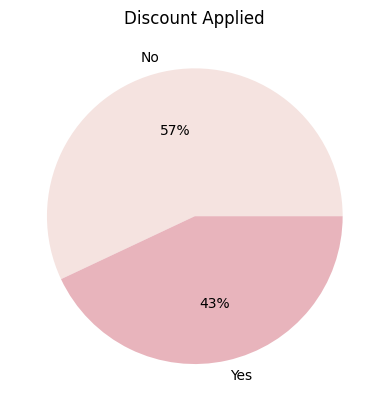

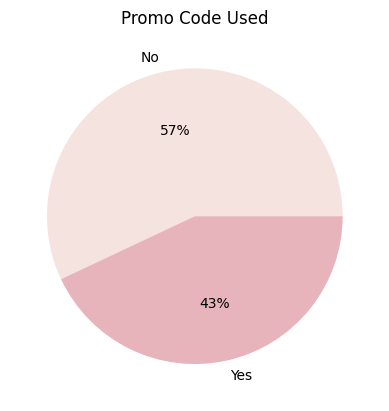

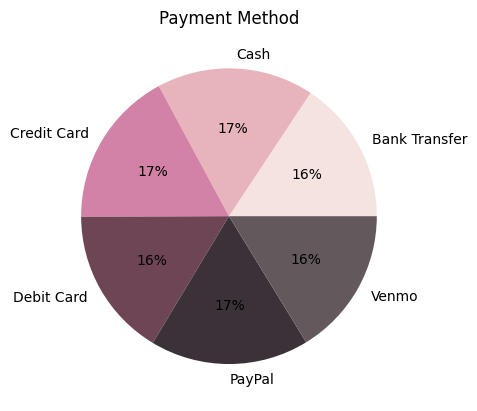

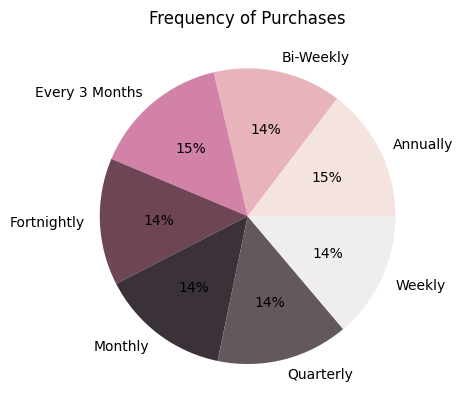

In [18]:
for col in pie_columns:
  df.groupby(col).size().plot(kind='pie',
                              autopct=label_function,
                              textprops={'fontsize': 10},
                              colors=colors,
                              title=col)
  plt.show()

In [19]:
bar_columns

['Item Purchased', 'Location', 'Color']

In [20]:
df[col].value_counts().index

Index(['Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly',
       'Fortnightly', 'Weekly'],
      dtype='object', name='Frequency of Purchases')

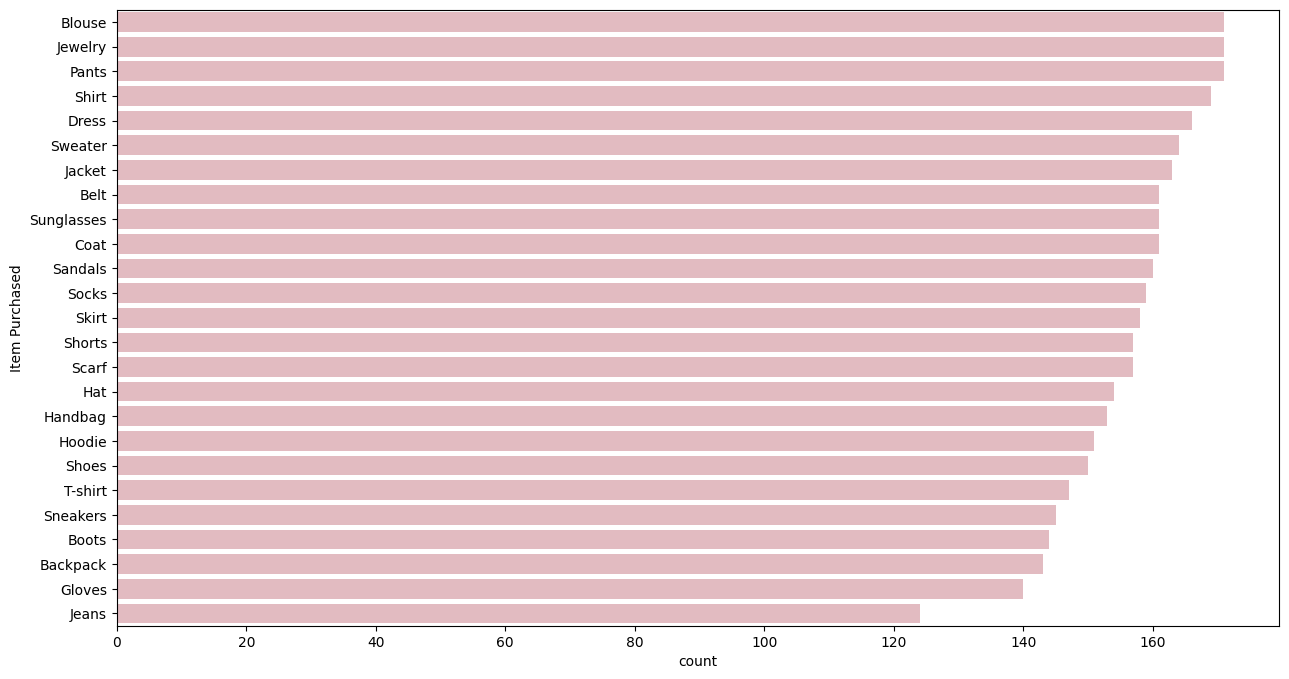

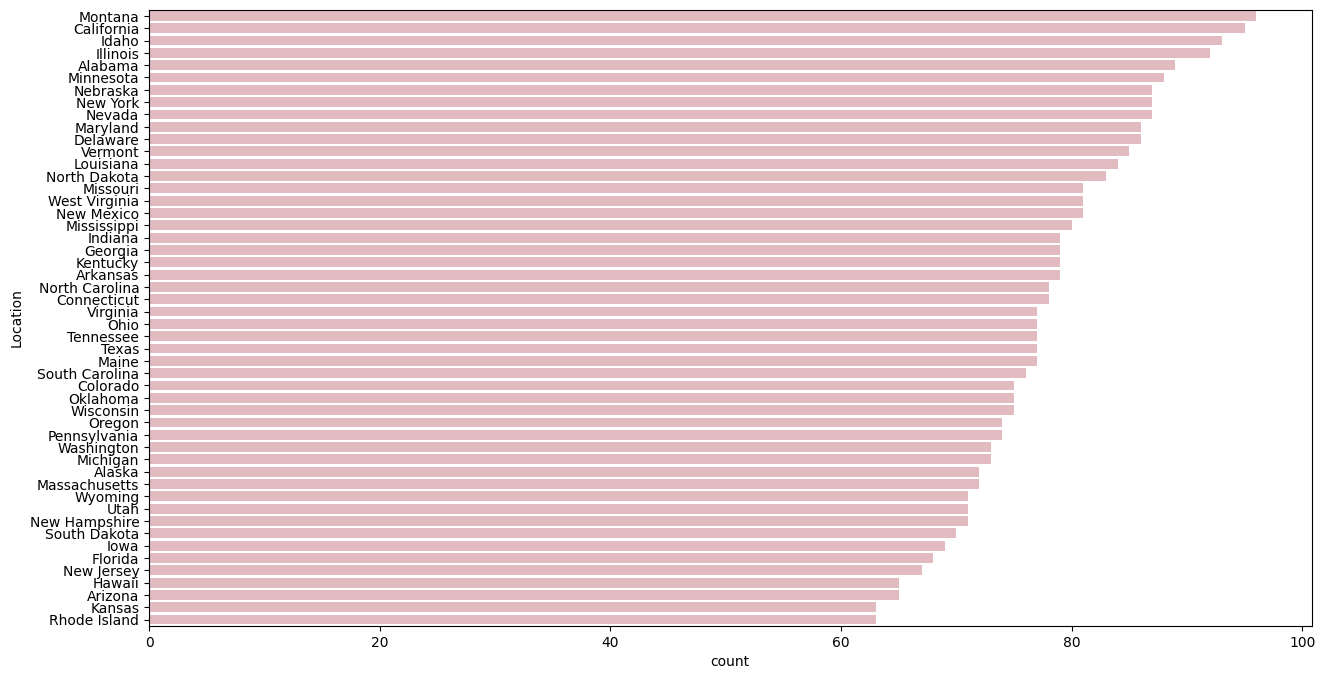

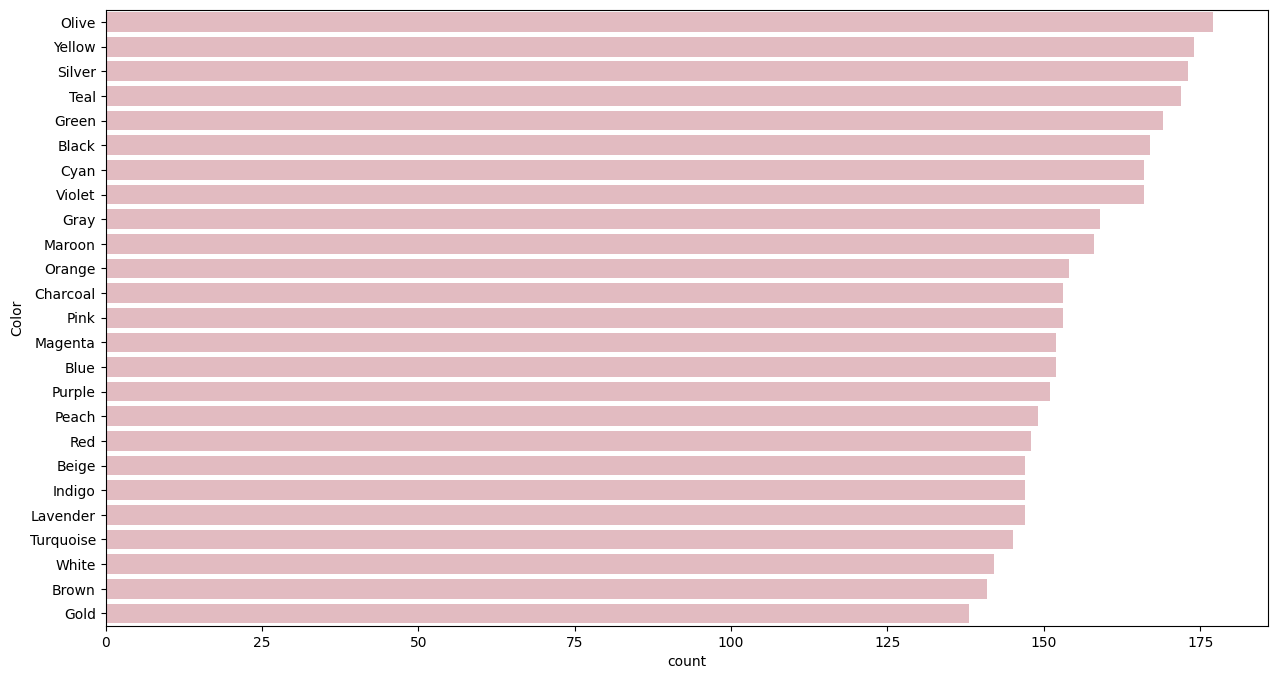

In [21]:
for col in bar_columns:
  plt.figure(figsize=(15, 8))
  sns.countplot(data=df,
                y=col,
                order=df[col].value_counts().index,
                color='#E8B4BC',)
  plt.show()

In the above bar charts we can see the most popular colors and purchased items. Besides, It is obvious that the most of our customers are from Montana and California.

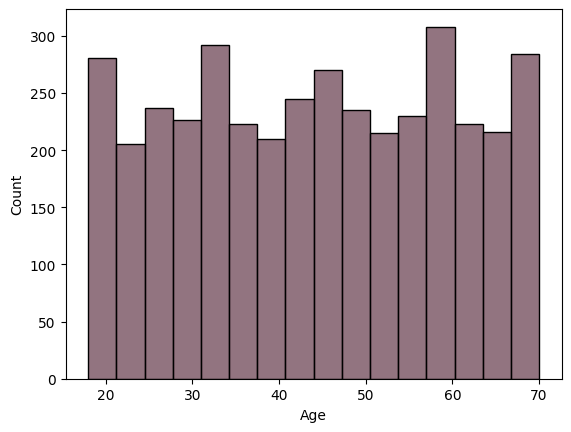

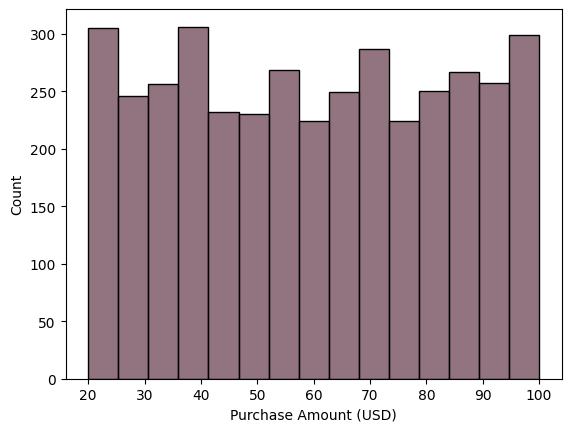

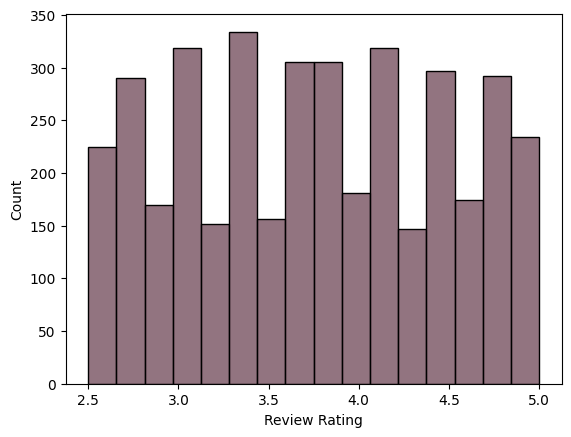

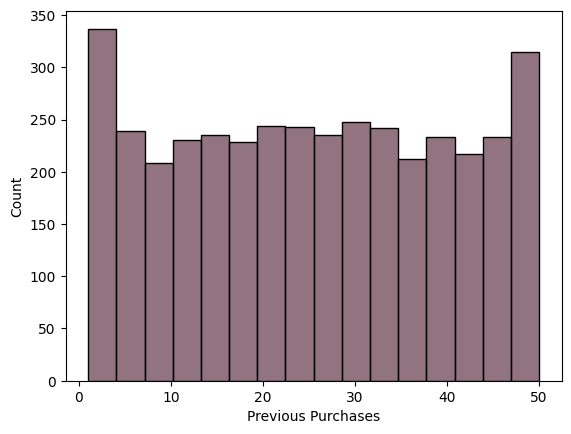

In [22]:
for col in numerical_columns:
  sns.histplot(df[col], color='#6E4555')
  plt.show()

Overally the histograms of the numerical columns don't seem so informative.

<div style="display:fill;
           border-radius:5px;
           background-color:#6E4555;
           font-size:80%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: left">

<h2 style="padding: 10px;
              color:#F0EDEE;">
              4-2- Bi-variant Analysis
</h2>
<a class="anchor" id="bi_varient"></a>
</div>

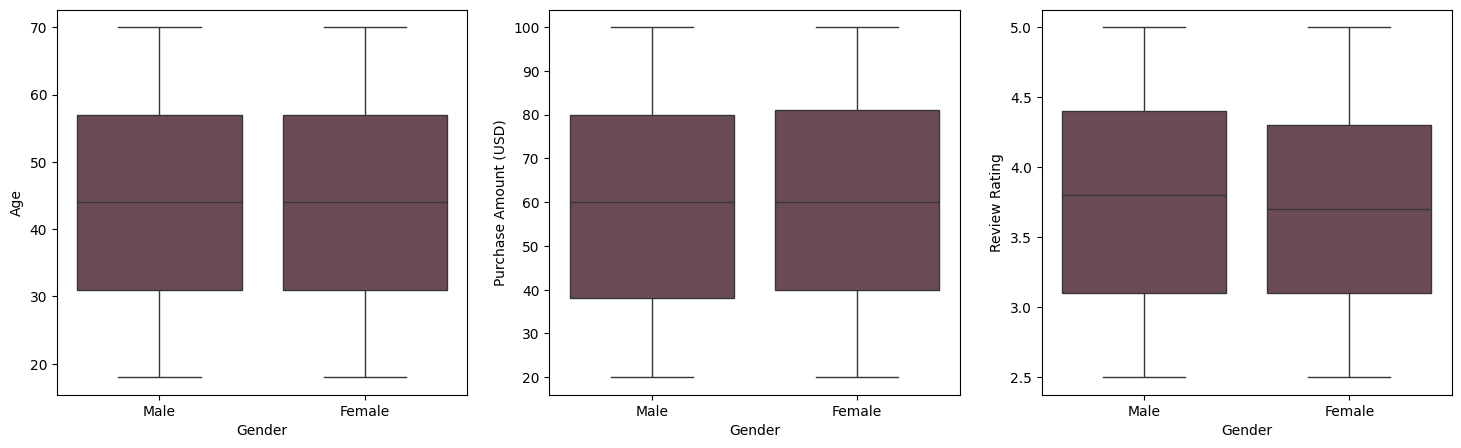

In [23]:
box_plots(df,
          'Gender',
          '#6E4555',
          *['Age', 'Purchase Amount (USD)', 'Review Rating'])

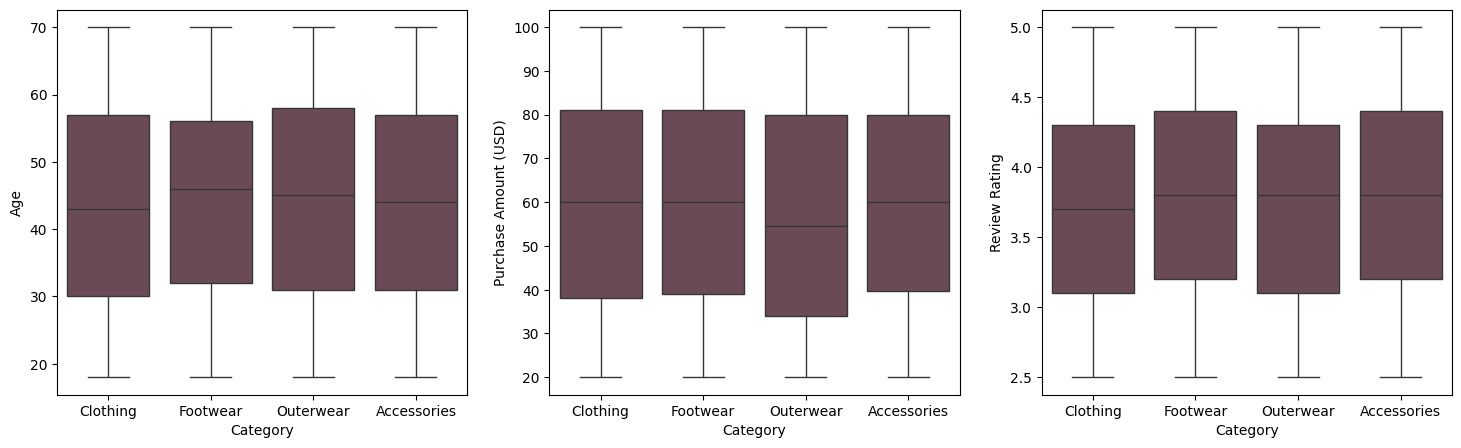

In [24]:
box_plots(df,
          'Category',
          '#6E4555',
          *['Age', 'Purchase Amount (USD)', 'Review Rating'])

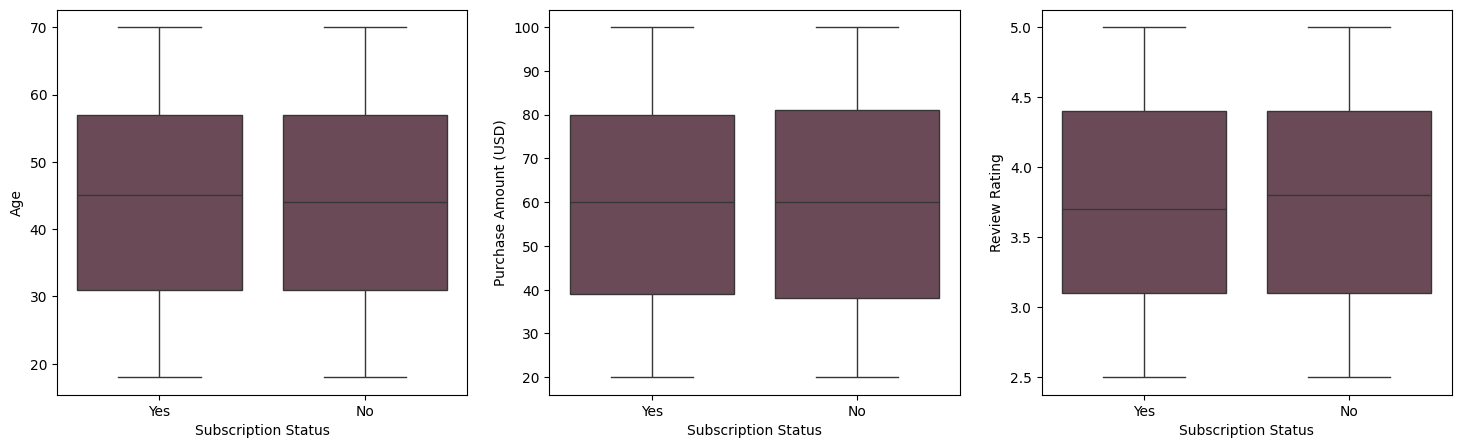

In [25]:
box_plots(df,
          'Subscription Status',
          '#6E4555',
          *['Age', 'Purchase Amount (USD)', 'Review Rating'])

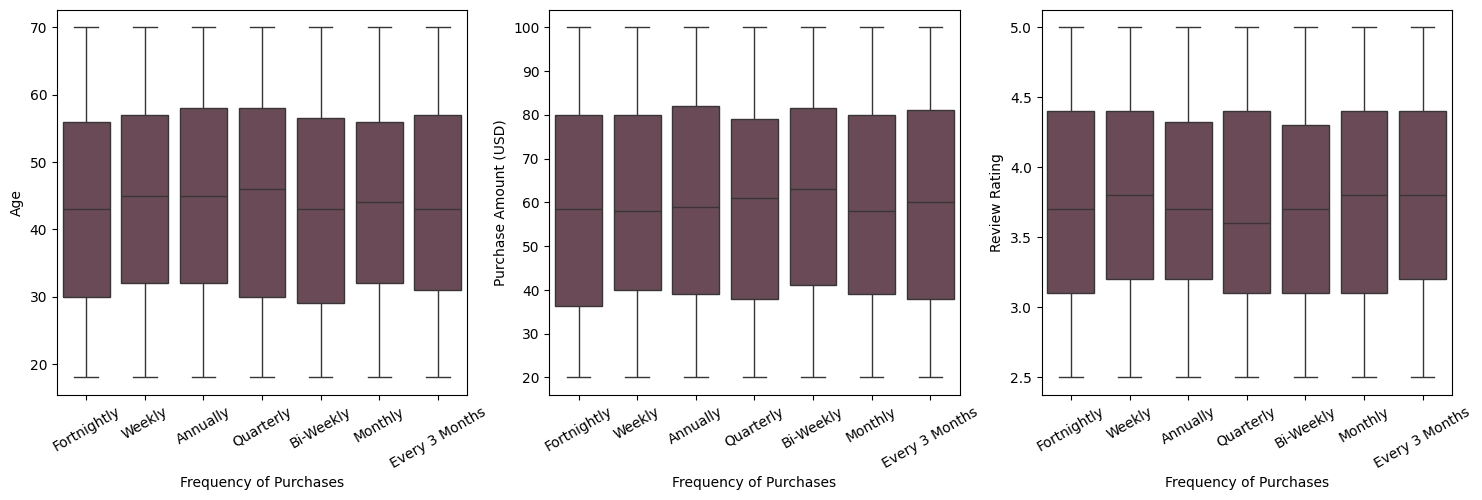

In [26]:
box_plots(df,
          'Frequency of Purchases',
          '#6E4555',
          *['Age', 'Purchase Amount (USD)', 'Review Rating'],
          rotation=30)

Through above box plots we can compare the age, purchased amounts and review rating in each specific categories of the most interesting categorical columns.

<ipython-input-27-01e4f6d9f07b>:1: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(data=df, x='Gender', hue='Size', palette=colors)


<Axes: xlabel='Gender', ylabel='count'>

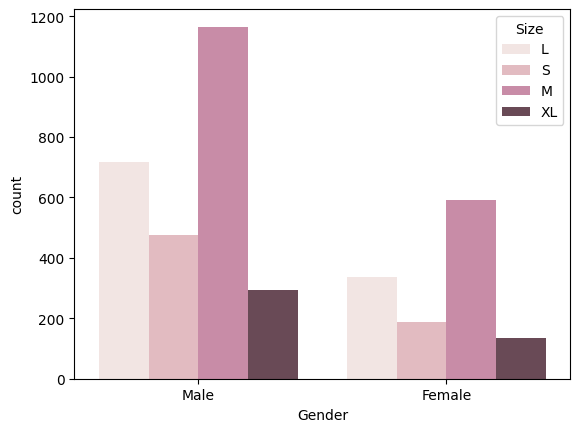

In [27]:
sns.countplot(data=df, x='Gender', hue='Size', palette=colors)

This chart shows that for both females and males, the M size has the most sell and the XL has the lowest sell.

<ipython-input-28-a2c0840fb12a>:1: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(data=df, x='Gender', hue='Category', palette=colors)


<Axes: xlabel='Gender', ylabel='count'>

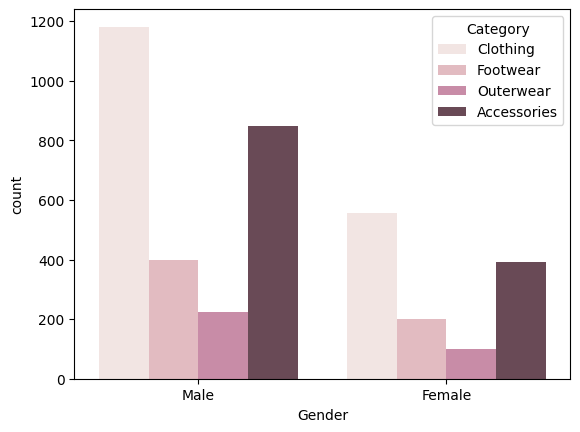

In [28]:
sns.countplot(data=df, x='Gender', hue='Category', palette=colors)

So clothing is the most popular category for both males and females.

<ipython-input-29-c8bc04c0e303>:1: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=df, x='Gender', hue='Subscription Status', palette=colors)


<Axes: xlabel='Gender', ylabel='count'>

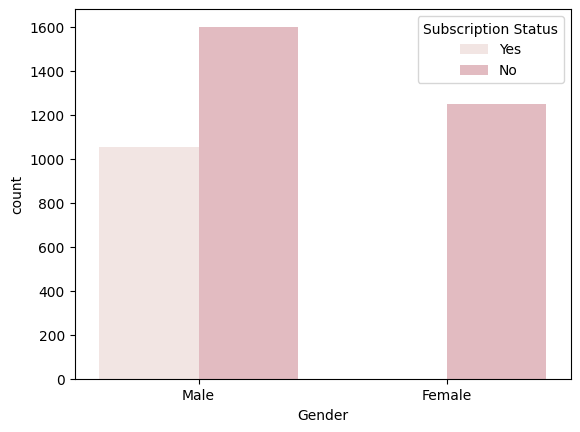

In [29]:
sns.countplot(data=df, x='Gender', hue='Subscription Status', palette=colors)

Almost all of our subscribed customers are males. Seems that this market is not so interesting for women to convince them to subscribe or maybe this is just a sampling error.

<ipython-input-30-f7b145375608>:1: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=df, x='Gender', hue='Discount Applied', palette=colors)


<Axes: xlabel='Gender', ylabel='count'>

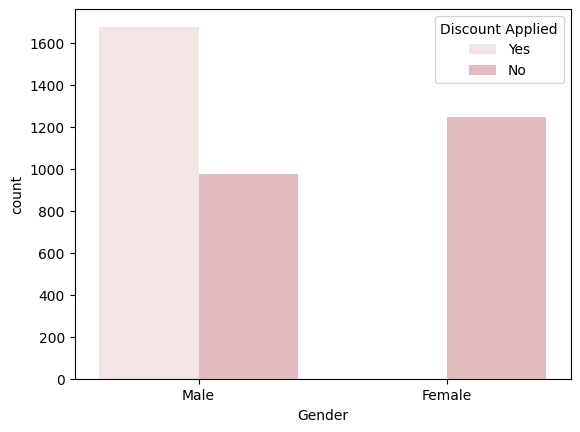

In [30]:
sns.countplot(data=df, x='Gender', hue='Discount Applied', palette=colors)

<Axes: xlabel='Gender', ylabel='count'>

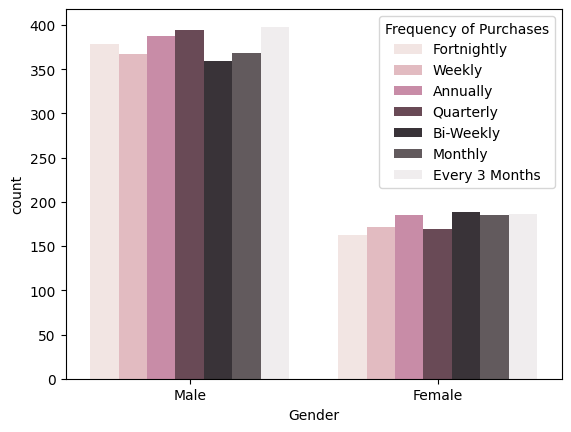

In [31]:
sns.countplot(data=df, x='Gender', hue='Frequency of Purchases', palette=colors)

<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              5- Inferential Statistics
</h1>
<a class="anchor" id="inferential"></a>
</div>

In this section we are going to ask some questions about the population data and then answer them based on the sample data which is provided here in this dataset. These kind of analysis could be refered as inferential analysis. In this kernel we are going to ask 3 analytical questions and answer them using confidence intervals. <br>
Our questions are as follows:
1. Determine the number of required items in each size for each gender
2. Determine the average age of customers in population
3. Determine the average age of the fans of each category

In [32]:
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly


<h2 style='color: #6E4555;'>1- Determine the number of required items in each size for each gender</h2>

In this sectin, we are going to determine the right number of items the market need
to keep in stock. If they keep a large number of items and having too much
inventory, they are not able to sell the products.
if they don’t supply an adequate amount of goods, they fail to meet the demand. <br>
Note that here for all of our inferential analysis we consider Location as a spliter feature which could be used to yield different samples for each size. <br>
For instance we do the analysis for male pants. For other products, the solution is the same.

In [33]:
males_pants = df[(df['Gender']=='Male') & (df['Item Purchased']=='Pants')]
males_pants = males_pants[['Customer ID', 'Location', 'Size']]
males_pants

,Customer ID,Location,Size
19,20,Rhode Island,M
20,21,Louisiana,M
21,22,North Carolina,M
22,23,California,M
23,24,Oklahoma,XL
...,...,...,...
2593,2594,Colorado,S
2619,2620,Connecticut,L
2637,2638,Alabama,M
2644,2645,New Mexico,M


In [34]:
inf_statistics_df = males_pants.groupby(['Size', 'Location'])['Customer ID'].count().unstack().fillna(0)
inf_statistics_df

Location,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Size,,,,,,,,,,,,,,,,,,,,,
L,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0
M,2.0,0.0,0.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0,...,1.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0
S,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
XL,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


We have 47 samples for each size, so we can use z table. Since we chose confidence_level = 95%, we have z = 1.96.

In [35]:
def get_confidence_intervals(mean: float, margin_error: float) -> Tuple[float, float]:
  """Returns confidence interval"""
  upper = np.ceil(mean+margin_error)
  lower = np.floor(mean-margin_error)
  return (lower, upper)

In [36]:
n = 47
z = 1.96
inf_statistics_df['mean'] = inf_statistics_df.mean(axis=1)
inf_statistics_df['std'] = inf_statistics_df.std(axis=1)
inf_statistics_df['margin_error'] = inf_statistics_df['std'] * z / np.sqrt(n)
inf_statistics_df['Confidence Interval'] = inf_statistics_df[['mean', 'margin_error']].apply(lambda x: get_confidence_intervals(*x), axis=1)
inf_statistics_df

Location,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,...,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,mean,std,margin_error,Confidence Interval
Size,,,,,,,,,,,,,,,,,,,,,
L,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.595745,0.762403,0.217968,"(0.0, 1.0)"
M,2.0,0.0,0.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0,...,3.0,1.0,1.0,0.0,0.0,2.0,1.382979,1.042770,0.298123,"(1.0, 2.0)"
S,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.340426,0.593461,0.169668,"(0.0, 1.0)"
XL,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.297872,0.501695,0.143432,"(0.0, 1.0)"


**Conclusion:** <br>
From above confidence intervals we can estimate how much male pants we need for each size. Since we chose confidence_level = 95%, we are 95% confident that the population parameters fall in these intervals for each size. <br>
Note that because of data limitations we performed this inferential analysis in this way. In real world with real data, it is better to consider the data for each location as a separate partition of the whole data and then perform the analysis for each location separately. Then we can count the required pants in each month for example and finally with 12 samples (for 12 months) we can perform a more reliable confidence interval analysis using T statistics.
This analysis could be used for any other items in this dataset to estimate the number of probable required items.

<h2 style='color: #6E4555;'>2- Determine the average age of customers in population</h2>

In [37]:
age_estimation = df[['Location', 'Age']]
age_estimation = age_estimation.groupby('Location', as_index=False)['Age'].mean()
age_estimation

,Location,Age
0,Alabama,44.314607
1,Alaska,43.000000
2,Arizona,45.276923
3,Arkansas,44.101266
4,California,42.663158
5,Colorado,44.146667
6,Connecticut,47.320513
7,Delaware,43.069767
8,Florida,42.323529
9,Georgia,43.772152


We have 50 samples, so we can use z table. This time we are going to estimate with confidence_level = 99%, so we have z = 2.57

In [38]:
n = 50
z = 2.57
mean = age_estimation['Age'].mean()
std = age_estimation['Age'].std()
margin_error = std * z / np.sqrt(n)
print(f'Confidence Interval = {(mean-margin_error , mean+margin_error)}')

Confidence Interval = (43.432218654899515, 44.69488717463504)


**Conclusion:** <br>
Basde on above estimations, we are 99% confident that the average age of our customers (in population) is something between 43 to 45 years old.

<h2 style='color: #6E4555;'>3- Determine the average age of the fans of each category</h2>

We are still proceeding with confidence_level = 99%, so we have z = 2.57

In [39]:
z = 2.57

for category in df['Category'].value_counts().index:
  category_fans = df[df['Category']==category]
  category_fans = category_fans[['Location', 'Age']]
  age_estimation = category_fans.groupby('Location', as_index=False)['Age'].mean()
  n = len(age_estimation)
  mean = age_estimation['Age'].mean()
  std = age_estimation['Age'].std()
  margin_error = std * z / np.sqrt(n)
  lower = np.floor(mean-margin_error)
  upper = np.ceil(mean+margin_error)
  print(f'99% Confidence Interval for {category} = {(lower , upper)}')

99% Confidence Interval for Clothing = (42.0, 45.0)
99% Confidence Interval for Accessories = (43.0, 46.0)
99% Confidence Interval for Footwear = (42.0, 46.0)
99% Confidence Interval for Outerwear = (42.0, 48.0)


**Conclusion:** <br>
Basde on above estimations, we are 99% confident that the average age of our customers (in population) for each category of products is located somewhere between printed ranges.

<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              6- Clustering; Customer Analytics
</h1>
<a class="anchor" id="clustering"></a>
</div>

In [40]:
df_cleaned = df.copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [41]:
print((df_cleaned['Discount Applied'] == df_cleaned['Promo Code Used']).sum(),
      (df_cleaned['Discount Applied'] == df_cleaned['Subscription Status']).sum())

3900 3276


So `Promo Code Used` column adds no more information and we have to remove it. Besides, `Item Purchased`, `Location` and `Color` have many distinct unique values and as a categorical feature, it is better to remove them.

In [42]:
df_cleaned.drop(['Customer ID', 'Item Purchased', 'Location', 'Color', 'Promo Code Used'], axis=1, inplace=True)
df_cleaned.head(3)

,Age,Gender,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Clothing,53,L,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly
1,19,Male,Clothing,64,L,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly
2,50,Male,Clothing,73,S,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly


In [43]:
categorical_features = []
numerical_features = []

for col in df_cleaned.columns:
  if df_cleaned[col].dtype == 'object':
    categorical_features.append(col)
  else:
    numerical_features.append(col)
print(len(numerical_features), len(categorical_features))

4 9


In [44]:
# Define preprocessing steps
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('variance_threshold', VarianceThreshold(threshold=0.1))  # Remove low-variance features
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder())  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

In [45]:
# Apply preprocessing
data_preprocessed = df_cleaned.copy()
data_preprocessed = preprocessor.fit_transform(data_preprocessed)

# Variance Threshold
print("Features after preprocessing (including variance threshold):", data_preprocessed.shape)

Features after preprocessing (including variance threshold): (3900, 41)


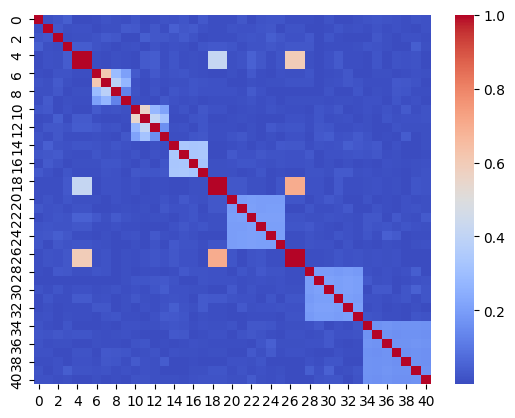

In [46]:
# Convert processed data to DataFrame for correlation analysis
df_preprocessed = pd.DataFrame(data_preprocessed)

# Correlation Analysis
corr_matrix = df_preprocessed.corr().abs()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [47]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Features to drop due to high correlation:", to_drop)
df_reduced_corr = df_preprocessed.drop(columns=to_drop)

Features to drop due to high correlation: [5, 19, 27]


In [48]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_reduced_corr)
print("PCA components shape:", df_pca.shape)

PCA components shape: (3900, 2)


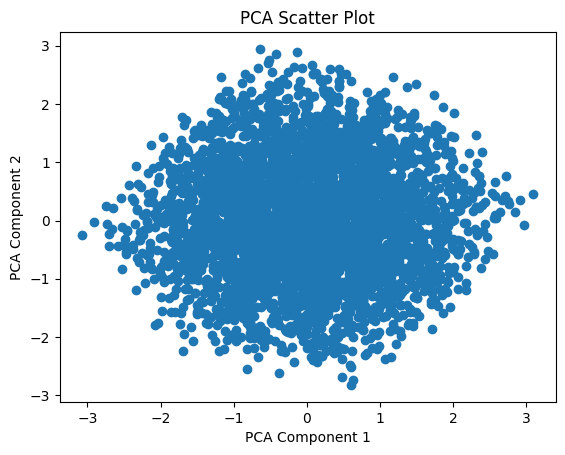

In [49]:
# Visualization of PCA
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot')
plt.show()

<div style="display:fill;
           border-radius:5px;
           background-color:#6E4555;
           font-size:80%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: left">

<h2 style="padding: 10px;
              color:#F0EDEE;">
              6-1- Evaluation of different clustering algorithms
</h2>
<a class="anchor" id="clustering_evaluation"></a>
</div>

In [50]:
# Implement clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=42)
agglo = AgglomerativeClustering(n_clusters=3)
gmm = GaussianMixture(n_components=3, covariance_type="full")

labels = {
    "K-Means": kmeans.fit_predict(df_pca),
    "Hierarchical": agglo.fit_predict(df_pca),
    "Gaussian Mixture": gmm.fit_predict(df_pca),
}

# Evaluate clustering algorithms with three evaluation metrics
metrics = {
    "Silhouette Score": silhouette_score,
    "Calinski Harabasz Score": calinski_harabasz_score,
    "Davies Bouldin Score": davies_bouldin_score,
}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
results = pd.DataFrame(columns=["Algorithm", "Metric", "Score"])
for name, label in labels.items():
    for metric_name, metric_func in metrics.items():
        score = metric_func(df_pca, label)
        dct = {"Algorithm": name, "Metric": metric_name, "Score": score}
        dct = {k:[v] for k,v in dct.items()}
        results = pd.concat([results,
                             pd.DataFrame(dct)]
                            ,axis=0 )

results

<ipython-input-51-b72722420c38>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results,


,Algorithm,Metric,Score
0,K-Means,Silhouette Score,0.350202
0,K-Means,Calinski Harabasz Score,2611.656722
0,K-Means,Davies Bouldin Score,0.898650
0,Hierarchical,Silhouette Score,0.294793
0,Hierarchical,Calinski Harabasz Score,1980.025123
0,Hierarchical,Davies Bouldin Score,1.003826
0,Gaussian Mixture,Silhouette Score,0.348034
0,Gaussian Mixture,Calinski Harabasz Score,2577.802711
0,Gaussian Mixture,Davies Bouldin Score,0.900515


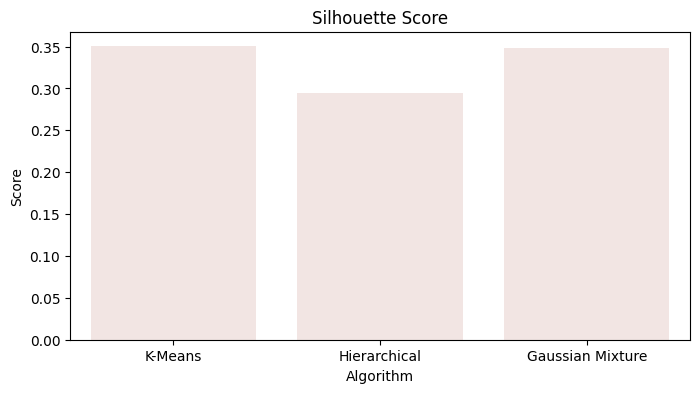

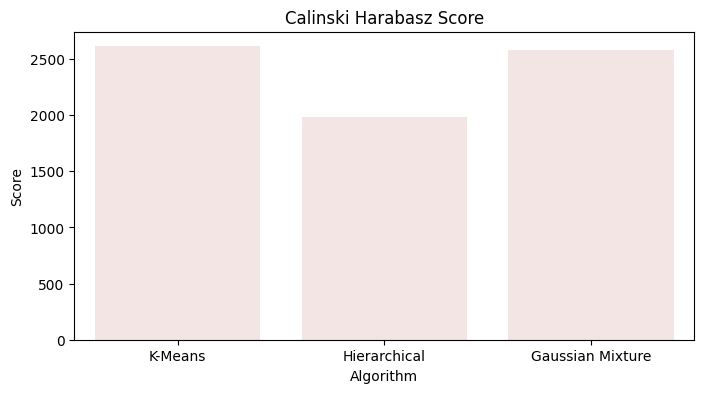

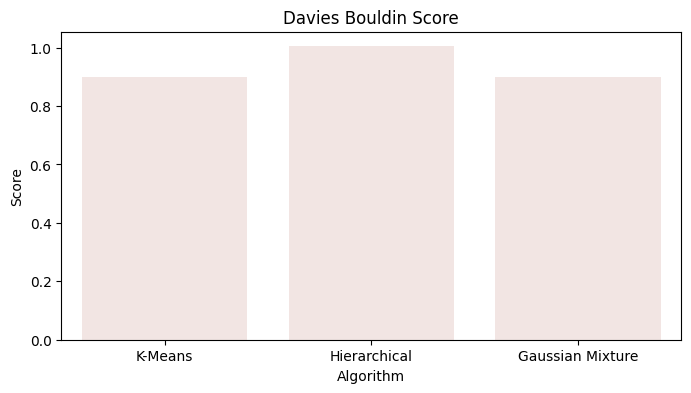

In [52]:
for metric in results['Metric'].unique():
  plt.figure(figsize=(8, 4))
  metric_df = results[results['Metric'] == metric]
  sns.barplot(x=metric_df['Algorithm'], y=metric_df['Score'], color=colors[0])
  plt.title(metric)
  plt.show()

The higher the Silhouette Coefficient and Calinski-Harabasz Score, the better the clustering algorithm. In constract, A low Davies-Bouldin Score means that the data has been clustered correctly. So the above plots show that the KMeans algorithm is the best one based on all 3 metrics.

<div style="display:fill;
           border-radius:5px;
           background-color:#6E4555;
           font-size:80%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: left">

<h2 style="padding: 10px;
              color:#F0EDEE;">
              6-2- KMeans Clustering Results
</h2>
<a class="anchor" id="kmeans_results"></a>
</div>

In [53]:
# Further steps would involve using the reduced feature set for clustering
# Clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


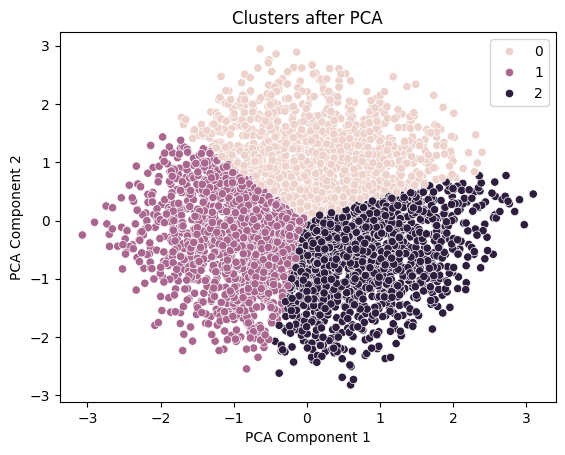

In [54]:
# Visualizing clusters
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, color=colors)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters after PCA')
plt.show()

In [55]:
df_clustered = df_cleaned.copy()
df_clustered['Cluster'] = labels
df_clustered.head(3)

,Age,Gender,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases,Cluster
0,55,Male,Clothing,53,L,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,1
1,19,Male,Clothing,64,L,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,2
2,50,Male,Clothing,73,S,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,1


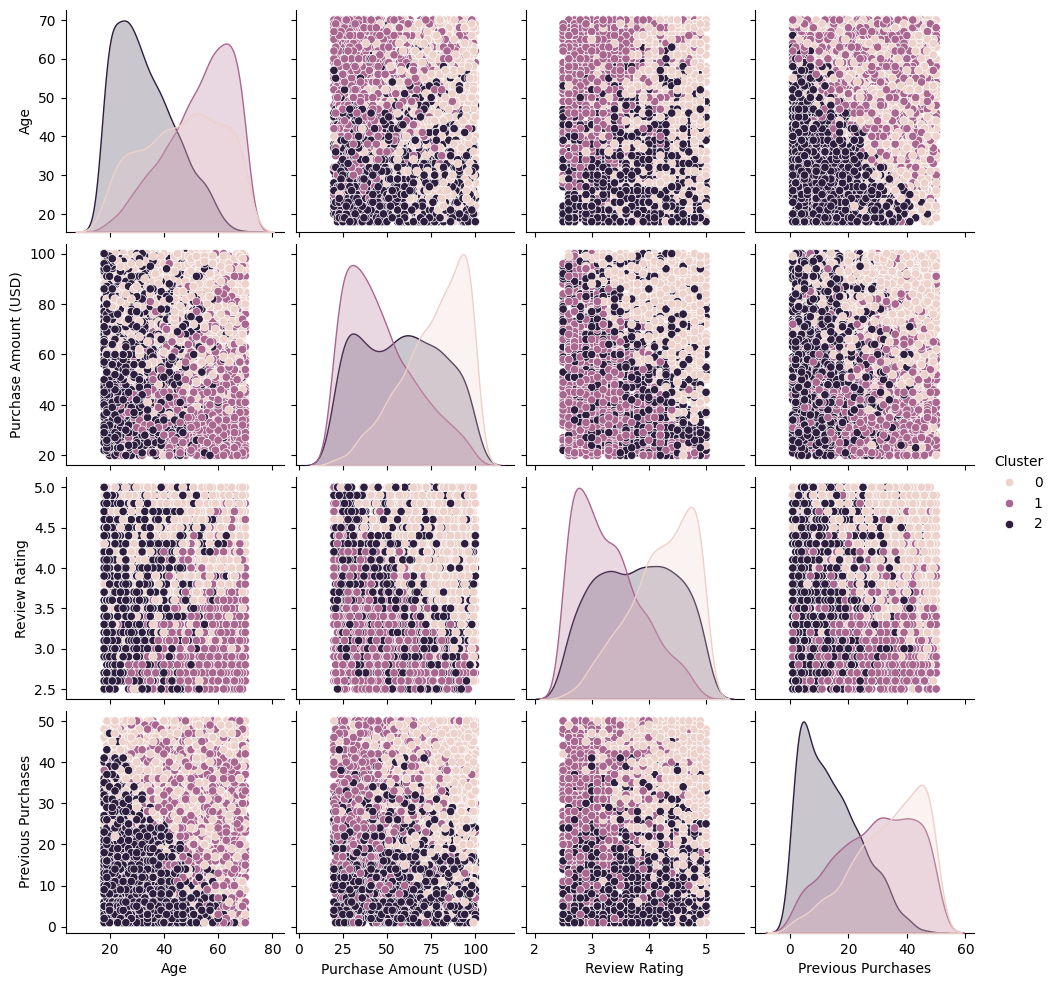

In [56]:
sns.pairplot(df_clustered, hue='Cluster')

<Axes: xlabel='Cluster', ylabel='count'>

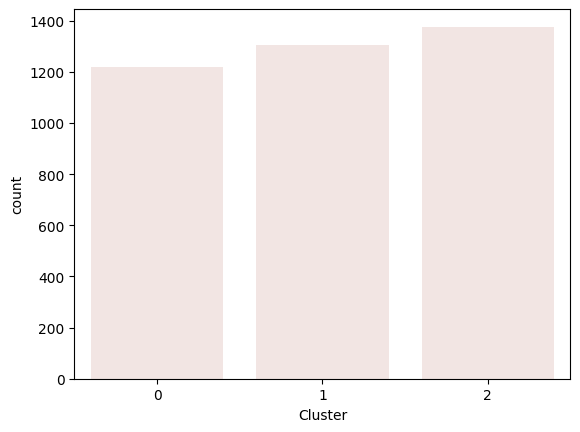

In [57]:
sns.countplot(df_clustered, x= 'Cluster', color=colors[0])

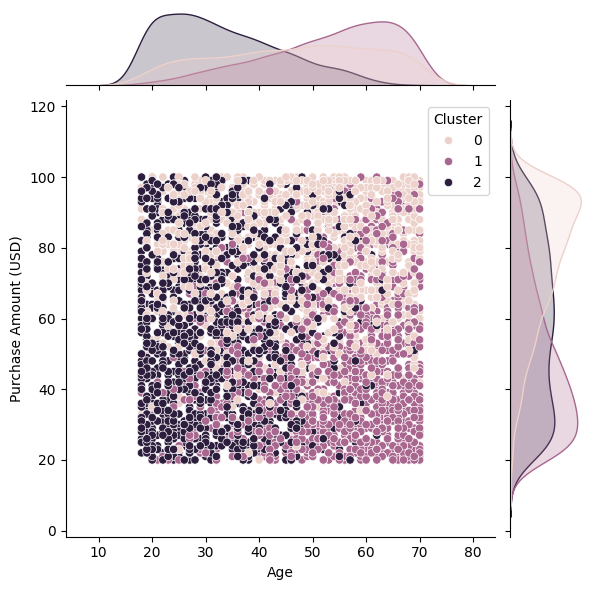

In [58]:
sns.jointplot(df_clustered, x='Age', y='Purchase Amount (USD)', hue='Cluster')

The joint plot is another nice way to compare our different segments which yields the same results as our previous pairplot.

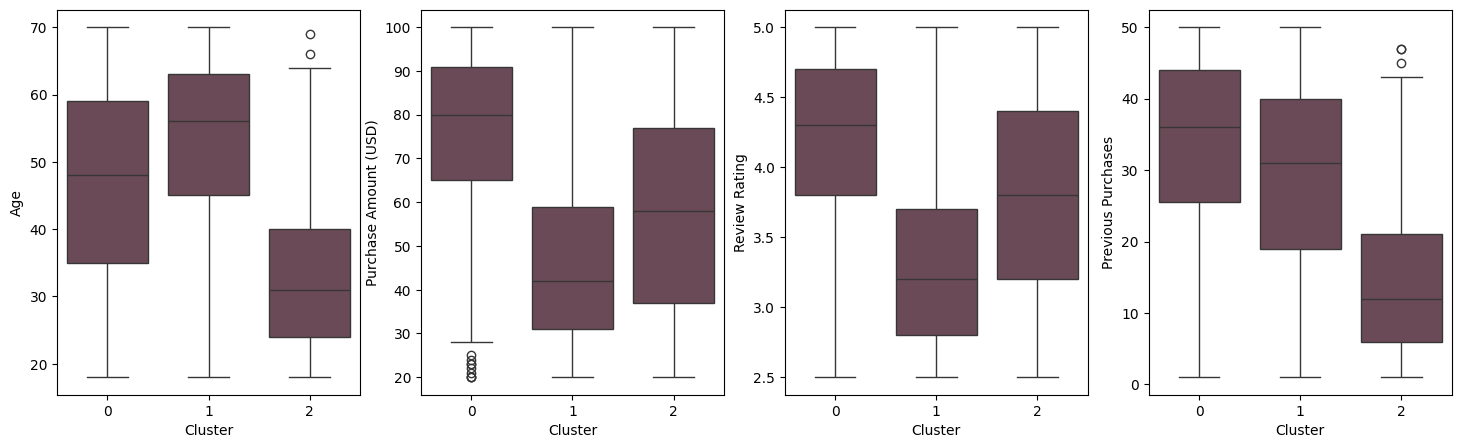

In [59]:
sns.color_palette(colors)
box_plots(df_clustered,
          'Cluster',
          '#6E4555',
          *['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases'])

So we have 3 main clusters which we can characterize them based on these boxplots and the previous pairplots:
1. So so, moderate satisfaction, moderate purchased amount: They are the youngest customers on average; Some of them purchased low and some others purchased more amounts in USD, but on average they paid between the other two groups. Also the review ratings are distributed almost uniformly among them. But on average their ratings are also between the other two groups.

2. High satisfaction, high purchased amount: These are our target customers; They are relatively young and have parchased more than the others. Besides, they seem the most satisfied customers.

3. Low satisfaction, low purchased amount: The customers who purchased less, they are relatively older, and are less satisfied with the products as they have relatively low review ratings.

<ipython-input-60-e879ee374dc2>:2: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=df_clustered, x='Cluster', hue=col, palette=colors)


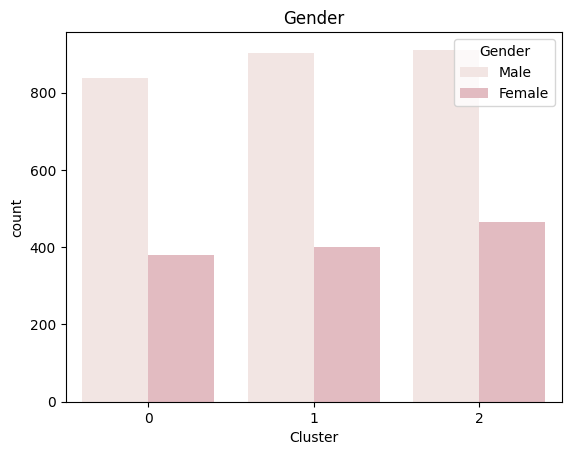

<ipython-input-60-e879ee374dc2>:2: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(data=df_clustered, x='Cluster', hue=col, palette=colors)


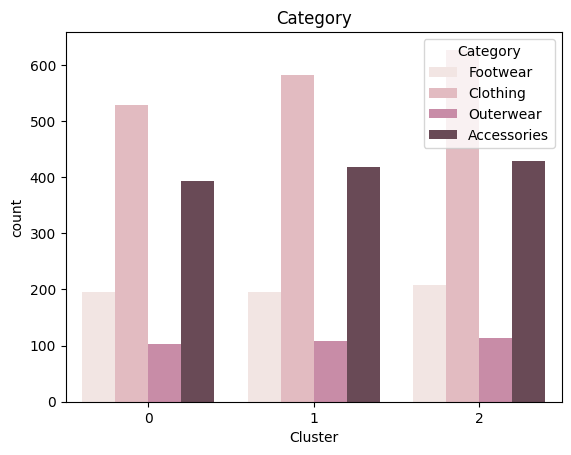

<ipython-input-60-e879ee374dc2>:2: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(data=df_clustered, x='Cluster', hue=col, palette=colors)


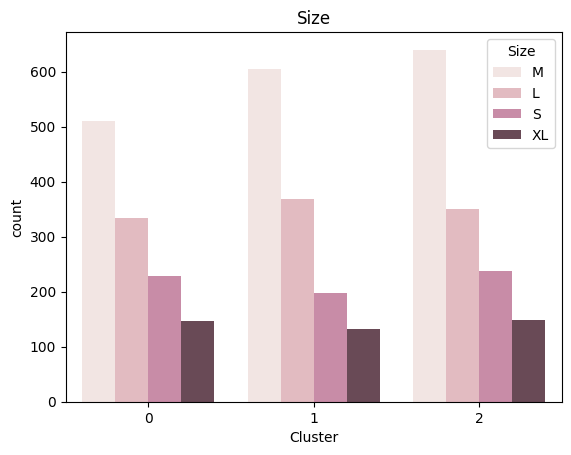

<ipython-input-60-e879ee374dc2>:2: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(data=df_clustered, x='Cluster', hue=col, palette=colors)


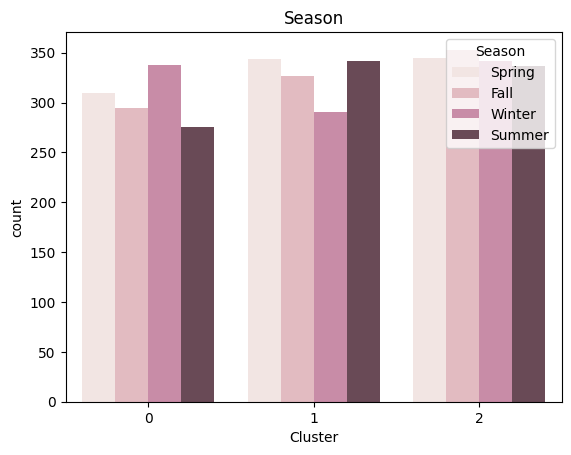

<ipython-input-60-e879ee374dc2>:2: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=df_clustered, x='Cluster', hue=col, palette=colors)


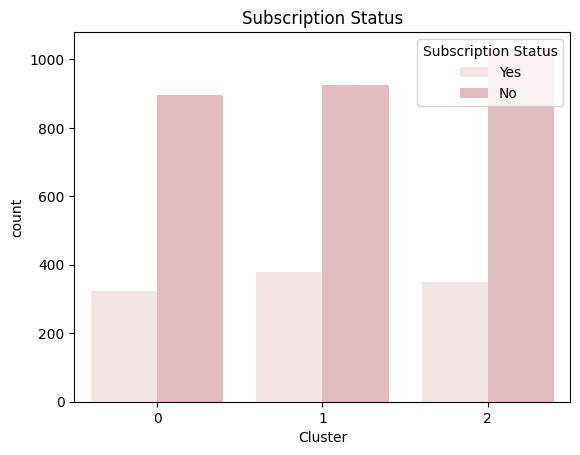

<ipython-input-60-e879ee374dc2>:2: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.countplot(data=df_clustered, x='Cluster', hue=col, palette=colors)


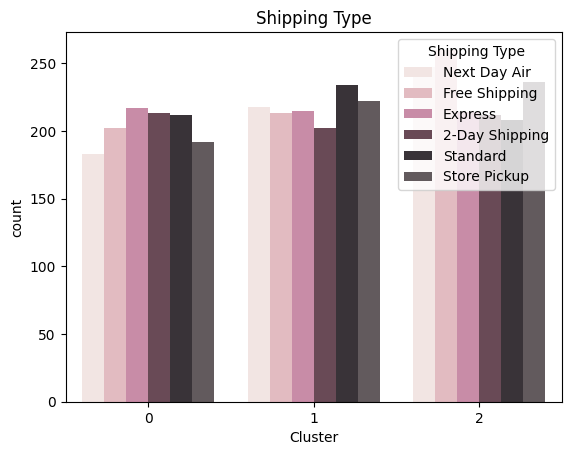

<ipython-input-60-e879ee374dc2>:2: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=df_clustered, x='Cluster', hue=col, palette=colors)


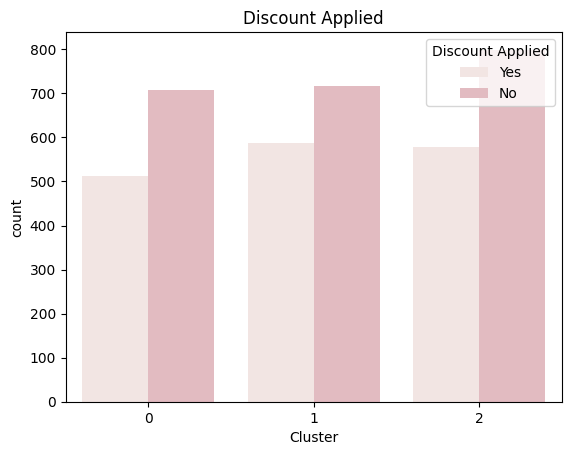

<ipython-input-60-e879ee374dc2>:2: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.countplot(data=df_clustered, x='Cluster', hue=col, palette=colors)


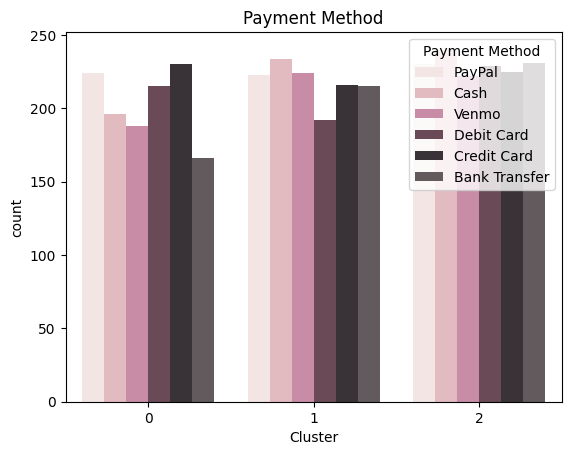

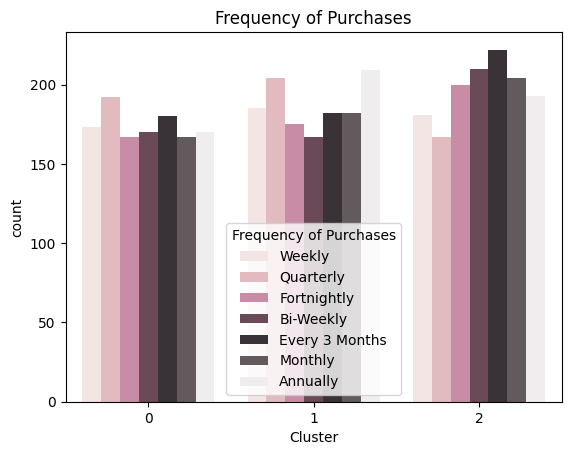

In [60]:
for col in categorical_features:
  sns.countplot(data=df_clustered, x='Cluster', hue=col, palette=colors)
  plt.title(col)
  plt.show()

<strong>Conclusion:</strong> <br>
The above bar charts can yield us more informations about our target customers; for example they are mostly males, they paid for clothing and accessories more than the other items, their size are mostly M and L, mostly purchased in winter, most of them have not subscribed yet, mainly don't use discounts, and often purchased quarterly. Also we can see their preferences for payment method and shipping type. <br>
The marketing strategy could be planned as make the target customers more satisfied and loyal, and the middle group of customers (the second group), which are the youngest ones, more encouraged to buy based on their preferences and charecteristics.